In [16]:
#Traveling Salesman Problem(TSP)
#A notorious NP-complete problem 
#Area : finance and marketing
#Objective: find the shortest path that would enable the salesman to visit all the cities 
#and return to its hometown (the city from where he started traveling)
#The salesman gets to maximize potential sales in the least amount of time.

# useful additional packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit.optimization.applications.ising import max_cut, tsp
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua import aqua_globals
from qiskit.aqua import QuantumInstance
from qiskit.optimization.applications.ising.common import sample_most_likely
from qiskit.optimization.algorithms import MinimumEigenOptimizer
from qiskit.optimization.converters import IsingToQuadraticProgram
from qiskit.optimization.problems import QuadraticProgram

# setup aqua logging
import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log


distance
 [[ 0. 48. 91.]
 [48.  0. 63.]
 [91. 63.  0.]]


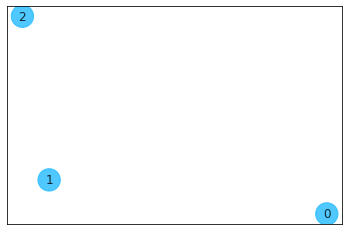

In [5]:
# Generating a graph of 3 nodes
n = 3
num_qubits = n ** 2
ins = tsp.random_tsp(n, seed=123)
G = nx.Graph()
G.add_nodes_from(np.arange(0, n, 1))
colors = ['#22bbff' for node in G.nodes()]
pos = {k: v for k, v in enumerate(ins.coord)}
default_axes = plt.axes(frameon=True)
nx.draw_networkx(G, node_color=colors, node_size=500, alpha=.8, ax=default_axes, pos=pos)
print('distance\n', ins.w)

order = (0, 1, 2) Distance = 202.0
Best order from brute force = (0, 1, 2) with total distance = 202.0


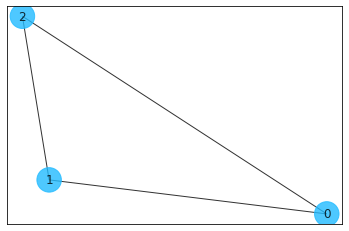

In [6]:
#Brute force approach
from itertools import permutations

def brute_force_tsp(w, N):
    a=list(permutations(range(1,N)))
    last_best_distance = 1e10
    for i in a:
        distance = 0
        pre_j = 0
        for j in i:
            distance = distance + w[j,pre_j]
            pre_j = j
        distance = distance + w[pre_j,0]
        order = (0,) + i
        if distance < last_best_distance:
            best_order = order
            last_best_distance = distance
            print('order = ' + str(order) + ' Distance = ' + str(distance))
    return last_best_distance, best_order

best_distance, best_order = brute_force_tsp(ins.w, ins.dim)
print('Best order from brute force = ' + str(best_order) + ' with total distance = ' + str(best_distance))

def draw_tsp_solution(G, order, colors, pos):
    G2 = G.copy()
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G2, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)

draw_tsp_solution(G, best_order, colors, pos)



In [8]:
#Mapping to the Ising problem

qubitOp, offset = tsp.get_operator(ins)
print('Offset:', offset)
print('Ising Hamiltonian:')
print(qubitOp.print_details())



Offset: 600303.0
Ising Hamiltonian:
IIIIIIIIZ	(-100069.5+0j)
IIIIZIIII	(-100055.5+0j)
IIIIZIIIZ	(12+0j)
IIIIIIIZI	(-100069.5+0j)
IIIZIIIII	(-100055.5+0j)
IIIZIIIZI	(12+0j)
IIIIIIZII	(-100069.5+0j)
IIIIIZIII	(-100055.5+0j)
IIIIIZZII	(12+0j)
IZIIIIIII	(-100077+0j)
IZIIIIIIZ	(22.75+0j)
ZIIIIIIII	(-100077+0j)
ZIIIIIIZI	(22.75+0j)
IIZIIIIII	(-100077+0j)
IIZIIIZII	(22.75+0j)
IIIIIZIZI	(12+0j)
IIIIZIZII	(12+0j)
IIIZIIIIZ	(12+0j)
IZIIIZIII	(15.75+0j)
ZIIIZIIII	(15.75+0j)
IIZZIIIII	(15.75+0j)
IIZIIIIZI	(22.75+0j)
IZIIIIZII	(22.75+0j)
ZIIIIIIIZ	(22.75+0j)
IIZIZIIII	(15.75+0j)
IZIZIIIII	(15.75+0j)
ZIIIIZIII	(15.75+0j)
IIIIIZIIZ	(50000+0j)
IIZIIIIIZ	(50000+0j)
IIZIIZIII	(50000+0j)
IIIIZIIZI	(50000+0j)
IZIIIIIZI	(50000+0j)
IZIIZIIII	(50000+0j)
IIIZIIZII	(50000+0j)
ZIIIIIZII	(50000+0j)
ZIIZIIIII	(50000+0j)
IIIIIIIZZ	(50000+0j)
IIIIIIZIZ	(50000+0j)
IIIIIIZZI	(50000+0j)
IIIIZZIII	(50000+0j)
IIIZIZIII	(50000+0j)
IIIZZIIII	(50000+0j)
IZZIIIIII	(50000+0j)
ZIZIIIIII	(50000+0j)
ZZIIIIIII	(50000+0j)



In [9]:
qp = QuadraticProgram()
qp.from_ising(qubitOp, offset, linear=True)
qp.to_docplex().prettyprint()

// This file has been generated by DOcplex
// model name is: AnonymousModel
// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;
dvar bool x_4;
dvar bool x_5;
dvar bool x_6;
dvar bool x_7;
dvar bool x_8;

minimize
 - 200000 x_0 - 200000 x_1 - 200000 x_2 - 200000 x_3 - 200000 x_4 - 200000 x_5
 - 200000 x_6 - 200000 x_7 - 200000 x_8 [ 200000 x_0*x_1 + 200000 x_0*x_2
 + 200000 x_0*x_3 + 48 x_0*x_4 + 48 x_0*x_5 + 200000 x_0*x_6 + 91 x_0*x_7
 + 91 x_0*x_8 + 200000 x_1*x_2 + 48 x_1*x_3 + 200000 x_1*x_4 + 48 x_1*x_5
 + 91 x_1*x_6 + 200000 x_1*x_7 + 91 x_1*x_8 + 48 x_2*x_3 + 48 x_2*x_4
 + 200000 x_2*x_5 + 91 x_2*x_6 + 91 x_2*x_7 + 200000 x_2*x_8 + 200000 x_3*x_4
 + 200000 x_3*x_5 + 200000 x_3*x_6 + 63 x_3*x_7 + 63 x_3*x_8 + 200000 x_4*x_5
 + 63 x_4*x_6 + 200000 x_4*x_7 + 63 x_4*x_8 + 63 x_5*x_6 + 63 x_5*x_7
 + 200000 x_5*x_8 + 200000 x_6*x_7 + 200000 x_6*x_8 + 200000 x_7*x_8 ] +
 600000;
 
subject to {

}


In [11]:
# solving Quadratic Program using exact classical eigensolver
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())
result = exact.solve(qp)
print(result)

optimal function value: 202.0
optimal value: [1. 0. 0. 0. 1. 0. 0. 0. 1.]
status: SUCCESS


energy: -600101.0
tsp objective: 202.0
feasible: True
solution: [0, 1, 2]
solution objective: 202.0


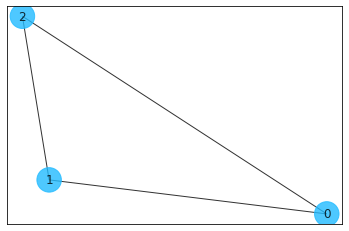

In [14]:
#Checking that the full Hamiltonian gives the right cost

#Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
ee = NumPyMinimumEigensolver(qubitOp)
result = ee.run()

print('energy:', result.eigenvalue.real)
print('tsp objective:', result.eigenvalue.real + offset)
x = sample_most_likely(result.eigenstate)
print('feasible:', tsp.tsp_feasible(x))
z = tsp.get_tsp_solution(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, ins.w))
draw_tsp_solution(G, z, colors, pos)



In [15]:
#Running it on quantum computer
aqua_globals.random_seed = np.random.default_rng(123)
seed = 10598
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)



2020-09-19 20:46:53,917:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: 
==================== Setting of VQE ============================
Algorithm: VQE
-- max_evals_grouped: 1
-- circuit_sampler: <qiskit.aqua.operators.converters.circuit_sampler.CircuitSampler object at 0x0000024CFB7C1520>
-- expectation: <qiskit.aqua.operators.expectations.matrix_expectation.MatrixExpectation object at 0x0000024CFB7D0730>
-- user_valid_expectation: False
-- include_custom: False
-- expect_op: None
-- operator: SummedOp([
  -100069.5 * IIIIIIIIZ,
  -100055.5 * IIIIZIIII,
  12.0 * IIIIZIIIZ,
  -100069.5 * IIIIIIIZI,
  -100055.5 * IIIZIIIII,
  12.0 * IIIZIIIZI,
  -100069.5 * IIIIIIZII,
  -100055.5 * IIIIIZIII,
  12.0 * IIIIIZZII,
  -100077.0 * IZIIIIIII,
  22.75 * IZIIIIIIZ,
  -100077.0 * ZIIIIIIII,
  22.75 * ZIIIIIIZI,
  -100077.0 * IIZIIIIII,
  22.75 * IIZIIIZII,
  12.0 * IIIIIZIZI,
  12.0 * IIIIZIZII,
  12.0 * IIIZIIIIZ,
  15.75 * IZIIIZIII,
  15.75 * ZIIIZIIII,
  15.75 * IIZZIIIII,
  22.75 * 

2020-09-19 20:46:53,917:qiskit.aqua.algorithms.vq_algorithm:INFO: Starting optimizer.
bounds=[(None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]
initial point=[ 2.2915011  -5.60685044 -3.51406148 -3.9663008  -4.07268656  3.92189524
  5.31991014 -2.80764892  4.01815433  4.89953608  0.16299155 -3

2020-09-19 20:46:55,752:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-160591.68396184] - 12.99286 (ms), eval count: 35
2020-09-19 20:46:55,772:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-95339.80555305] - 17.99011 (ms), eval count: 36
2020-09-19 20:46:55,791:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-125377.65653334] - 15.99193 (ms), eval count: 37
2020-09-19 20:46:55,812:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-130094.21907836] - 18.99099 (ms), eval count: 38
2020-09-19 20:46:55,835:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-97881.22156352] - 19.98830 (ms), eval count: 39
2020-09-19 20:46:55,856:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-135322.07155658] - 18.99052 (ms), eval count: 40
2020-09-19 20:46:55,858:qiskit.aqua.components.optimizers.sp

2020-09-19 20:46:56,367:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 9: -250982.3393916
2020-09-19 20:46:56,383:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-234133.23719166] - 15.62452 (ms), eval count: 71
2020-09-19 20:46:56,405:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-256650.32586511] - 22.13001 (ms), eval count: 72
2020-09-19 20:46:56,405:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 10: -234133.2371917
2020-09-19 20:46:56,405:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 10: -256650.3258651
2020-09-19 20:46:56,420:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-255359.07204241] - 15.63215 (ms), eval count: 73
2020-09-19 20:46:56,436:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-244875.20110192] - 15.62119 (ms)

2020-09-19 20:46:56,935:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-296010.18485978] - 12.99071 (ms), eval count: 100
2020-09-19 20:46:56,937:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 24: -294269.6430133
2020-09-19 20:46:56,938:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 24: -296010.1848598
2020-09-19 20:46:56,955:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-276358.24231515] - 14.99081 (ms), eval count: 101
2020-09-19 20:46:56,970:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-312404.94812237] - 13.99207 (ms), eval count: 102
2020-09-19 20:46:56,972:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 25: -276358.2423152
2020-09-19 20:46:56,974:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 25: -312404.9481224
2020-0

2020-09-19 20:46:57,523:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 38: -364301.9647551
2020-09-19 20:46:57,523:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 38: -398660.2041991
2020-09-19 20:46:57,554:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-396719.56038495] - 31.24833 (ms), eval count: 129
2020-09-19 20:46:57,570:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-362502.64968416] - 15.62047 (ms), eval count: 130
2020-09-19 20:46:57,570:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 39: -396719.5603849
2020-09-19 20:46:57,570:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 39: -362502.6496842
2020-09-19 20:46:57,586:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-401561.19137913] - 15.62500 (ms), eval count: 131
2020-0

2020-09-19 20:46:58,140:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-456126.07815833] - 15.62023 (ms), eval count: 157
2020-09-19 20:46:58,172:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-470117.87729406] - 31.24452 (ms), eval count: 158
2020-09-19 20:46:58,172:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 53: -456126.0781583
2020-09-19 20:46:58,172:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 53: -470117.8772941
2020-09-19 20:46:58,187:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-455467.97297701] - 15.62715 (ms), eval count: 159
2020-09-19 20:46:58,209:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-477989.60935411] - 22.12930 (ms), eval count: 160
2020-09-19 20:46:58,209:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step 

2020-09-19 20:46:58,758:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-485473.71059106] - 15.62333 (ms), eval count: 186
2020-09-19 20:46:58,758:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 67: -492040.0891065
2020-09-19 20:46:58,758:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 67: -485473.7105911
2020-09-19 20:46:58,773:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-488896.55182077] - 15.62285 (ms), eval count: 187
2020-09-19 20:46:58,789:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-480125.10400392] - 15.62905 (ms), eval count: 188
2020-09-19 20:46:58,789:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 68: -488896.5518208
2020-09-19 20:46:58,789:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 68: -480125.1040039
2020-0

2020-09-19 20:46:59,327:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 81: -503580.1518615
2020-09-19 20:46:59,327:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 81: -523917.6867701
2020-09-19 20:46:59,358:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-514139.77666955] - 15.62548 (ms), eval count: 215
2020-09-19 20:46:59,374:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-494962.096863] - 15.62214 (ms), eval count: 216
2020-09-19 20:46:59,374:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 82: -514139.7766695
2020-09-19 20:46:59,374:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 82: -494962.0968630
2020-09-19 20:46:59,390:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-513373.50077999] - 15.63287 (ms), eval count: 217
2020-09-

2020-09-19 20:46:59,891:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-512289.77235065] - 31.24762 (ms), eval count: 243
2020-09-19 20:46:59,907:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-530607.925063] - 15.62643 (ms), eval count: 244
2020-09-19 20:46:59,907:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 96: -512289.7723507
2020-09-19 20:46:59,913:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 96: -530607.9250630
2020-09-19 20:46:59,929:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-531935.30539261] - 15.63120 (ms), eval count: 245
2020-09-19 20:46:59,944:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-515983.61641619] - 15.62214 (ms), eval count: 246
2020-09-19 20:46:59,944:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 

2020-09-19 20:47:00,408:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-547384.02273453] - 15.62166 (ms), eval count: 272
2020-09-19 20:47:00,414:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 110: -515236.0935803
2020-09-19 20:47:00,414:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 110: -547384.0227345
2020-09-19 20:47:00,430:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-527861.26263734] - 15.62929 (ms), eval count: 273
2020-09-19 20:47:00,446:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-536437.62867276] - 15.62572 (ms), eval count: 274
2020-09-19 20:47:00,446:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 111: -527861.2626373
2020-09-19 20:47:00,446:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 111: -536437.6286728
20

2020-09-19 20:47:00,946:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 124: -542287.2053996
2020-09-19 20:47:00,946:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 124: -545833.2963626
2020-09-19 20:47:00,962:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-547634.07644636] - 15.62333 (ms), eval count: 301
2020-09-19 20:47:00,993:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-545176.62732322] - 15.62285 (ms), eval count: 302
2020-09-19 20:47:00,993:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 125: -547634.0764464
2020-09-19 20:47:00,993:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 125: -545176.6273232
2020-09-19 20:47:01,009:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-554288.14786175] - 15.62476 (ms), eval count: 303
20

2020-09-19 20:47:01,465:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 138: -541502.8329405
2020-09-19 20:47:01,480:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-533562.39481699] - 15.62500 (ms), eval count: 329
2020-09-19 20:47:01,496:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-556690.03304062] - 0.00000 (ms), eval count: 330
2020-09-19 20:47:01,496:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 139: -533562.3948170
2020-09-19 20:47:01,496:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 139: -556690.0330406
2020-09-19 20:47:01,517:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-556002.74932247] - 5.00774 (ms), eval count: 331
2020-09-19 20:47:01,532:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-552497.571888] - 15.63025 (

2020-09-19 20:47:02,018:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-557999.47282903] - 22.13168 (ms), eval count: 357
2020-09-19 20:47:02,033:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-560752.66607738] - 15.62953 (ms), eval count: 358
2020-09-19 20:47:02,033:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 153: -557999.4728290
2020-09-19 20:47:02,033:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 153: -560752.6660774
2020-09-19 20:47:02,065:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-547636.737171] - 31.25501 (ms), eval count: 359
2020-09-19 20:47:02,080:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-567777.79817446] - 15.61761 (ms), eval count: 360
2020-09-19 20:47:02,080:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step 

2020-09-19 20:47:02,619:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-563091.70420645] - 0.00000 (ms), eval count: 386
2020-09-19 20:47:02,619:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 167: -554581.3919230
2020-09-19 20:47:02,635:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 167: -563091.7042064
2020-09-19 20:47:02,651:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-549449.97686674] - 15.62572 (ms), eval count: 387
2020-09-19 20:47:02,666:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-565904.62376076] - 15.62214 (ms), eval count: 388
2020-09-19 20:47:02,666:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 168: -549449.9768667
2020-09-19 20:47:02,666:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 168: -565904.6237608
202

2020-09-19 20:47:03,152:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 181: -567614.0684886
2020-09-19 20:47:03,152:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 181: -567812.7113538
2020-09-19 20:47:03,183:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-569465.02672199] - 15.62381 (ms), eval count: 415
2020-09-19 20:47:03,199:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-568547.16269787] - 15.62524 (ms), eval count: 416
2020-09-19 20:47:03,199:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 182: -569465.0267220
2020-09-19 20:47:03,199:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 182: -568547.1626979
2020-09-19 20:47:03,214:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-561533.12993922] - 15.62309 (ms), eval count: 417
20

2020-09-19 20:47:03,653:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 195: -567265.8695126
2020-09-19 20:47:03,669:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-577117.66894854] - 15.62285 (ms), eval count: 443
2020-09-19 20:47:03,700:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-566763.73973022] - 31.24905 (ms), eval count: 444
2020-09-19 20:47:03,700:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 196: -577117.6689485
2020-09-19 20:47:03,700:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 196: -566763.7397302
2020-09-19 20:47:03,716:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-569575.47430321] - 15.62238 (ms), eval count: 445
2020-09-19 20:47:03,738:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-561607.68262656] - 15.635

2020-09-19 20:47:04,255:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-571094.41562077] - 15.62500 (ms), eval count: 471
2020-09-19 20:47:04,270:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-567044.207328] - 0.00000 (ms), eval count: 472
2020-09-19 20:47:04,270:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 210: -571094.4156208
2020-09-19 20:47:04,286:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 210: -567044.2073280
2020-09-19 20:47:04,302:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-571328.10483336] - 15.62381 (ms), eval count: 473
2020-09-19 20:47:04,317:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-565158.90300568] - 15.62476 (ms), eval count: 474
2020-09-19 20:47:04,317:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step #

2020-09-19 20:47:04,972:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-572969.71458334] - 1.10960 (ms), eval count: 500
2020-09-19 20:47:04,972:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 224: -569390.8717183
2020-09-19 20:47:04,988:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 224: -572969.7145833
2020-09-19 20:47:05,003:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-560381.03811285] - 15.62452 (ms), eval count: 501
2020-09-19 20:47:05,019:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-560333.92153916] - 15.62810 (ms), eval count: 502
2020-09-19 20:47:05,019:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 225: -560381.0381129
2020-09-19 20:47:05,025:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 225: -560333.9215392
202

2020-09-19 20:47:05,557:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 238: -565849.5711891
2020-09-19 20:47:05,557:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 238: -565354.3412942
2020-09-19 20:47:05,573:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-569537.96397842] - 15.62357 (ms), eval count: 529
2020-09-19 20:47:05,589:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-575809.62243307] - 15.62238 (ms), eval count: 530
2020-09-19 20:47:05,589:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 239: -569537.9639784
2020-09-19 20:47:05,589:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 239: -575809.6224331
2020-09-19 20:47:05,620:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-565174.40726061] - 15.62500 (ms), eval count: 531
20

2020-09-19 20:47:06,090:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 252: -568102.5917402
2020-09-19 20:47:06,090:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-572255.7005209] - 0.00000 (ms), eval count: 557
2020-09-19 20:47:06,106:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-576513.07702113] - 0.00000 (ms), eval count: 558
2020-09-19 20:47:06,121:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 253: -572255.7005209
2020-09-19 20:47:06,121:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 253: -576513.0770211
2020-09-19 20:47:06,128:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-576995.14154509] - 6.50692 (ms), eval count: 559
2020-09-19 20:47:06,143:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-571392.95353191] - 0.00000 (m

2020-09-19 20:47:06,607:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-577630.93994759] - 15.62357 (ms), eval count: 585
2020-09-19 20:47:06,629:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-576984.98972605] - 22.12787 (ms), eval count: 586
2020-09-19 20:47:06,629:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 267: -577630.9399476
2020-09-19 20:47:06,629:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 267: -576984.9897260
2020-09-19 20:47:06,645:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-568616.53444531] - 15.63311 (ms), eval count: 587
2020-09-19 20:47:06,660:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-577892.40592188] - 15.62858 (ms), eval count: 588
2020-09-19 20:47:06,676:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for ste

2020-09-19 20:47:07,193:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-571607.21253442] - 15.63001 (ms), eval count: 614
2020-09-19 20:47:07,193:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 281: -564369.3002668
2020-09-19 20:47:07,193:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 281: -571607.2125344
2020-09-19 20:47:07,208:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-570748.28546894] - 15.62285 (ms), eval count: 615
2020-09-19 20:47:07,231:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-576120.47180445] - 6.50620 (ms), eval count: 616
2020-09-19 20:47:07,231:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 282: -570748.2854689
2020-09-19 20:47:07,231:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 282: -576120.4718045
202

2020-09-19 20:47:07,732:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 295: -576864.3494373
2020-09-19 20:47:07,732:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 295: -572479.5811095
2020-09-19 20:47:07,747:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-570205.42989051] - 15.63001 (ms), eval count: 643
2020-09-19 20:47:07,763:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-570375.85173231] - 15.62285 (ms), eval count: 644
2020-09-19 20:47:07,763:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 296: -570205.4298905
2020-09-19 20:47:07,763:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 296: -570375.8517323
2020-09-19 20:47:07,779:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-577825.30352395] - 15.62428 (ms), eval count: 645
20

energy: -587129.799559021
time: 13.993592023849487
feasible: True
solution: [1, 2, 0]
solution objective: 202.0


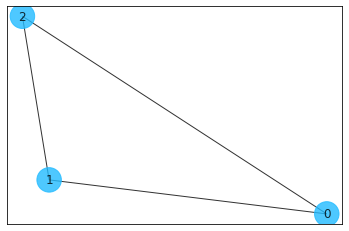

In [17]:
spsa = SPSA(maxiter=300)
ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')
vqe = VQE(qubitOp, ry, spsa, quantum_instance=quantum_instance)

result = vqe.run(quantum_instance)

print('energy:', result.eigenvalue.real)
print('time:', result.optimizer_time)
x = sample_most_likely(result.eigenstate)
print('feasible:', tsp.tsp_feasible(x))
z = tsp.get_tsp_solution(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, ins.w))
draw_tsp_solution(G, z, colors, pos)

In [18]:
aqua_globals.random_seed = np.random.default_rng(123)
seed = 10598
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

2020-09-19 20:47:41,270:qiskit.aqua.quantum_instance:INFO: statevector backend only works with shot=1, change shots from 1024 to 1.
2020-09-19 20:47:41,270:qiskit.aqua.quantum_instance:INFO: 
Qiskit Terra version: 0.15.2
Backend: 'statevector_simulator (AerProvider)', with following setting:
{'basis_gates': ['u1', 'u2', 'u3', 'cx', 'cz', 'id', 'x', 'y', 'z', 'h', 's', 'sdg', 't', 'tdg', 'swap', 'ccx', 'unitary', 'diagonal', 'initialize', 'cu1', 'cu2', 'cu3', 'cswap', 'mcx', 'mcy', 'mcz', 'mcu1', 'mcu2', 'mcu3', 'mcswap', 'multiplexer'], 'coupling_map': None}
{'pass_manager': None, 'initial_layout': None, 'seed_transpiler': 10598, 'optimization_level': None}
RunConfig(max_credits=10, seed_simulator=10598, shots=1)
{'timeout': None}
{}
{}
Measurement mitigation: None


2020-09-19 20:48:16,442:qiskit.aqua.algorithms.vq_algorithm:INFO: Starting optimizer.
bounds=[(None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]
initial point=[ 2.2915011  -5.60685044 -3.51406148 -3.9663008  -4.07268656  3.92189524
  5.31991014 -2.80764892  4.01815433  4.89953608  0.16299155 -3

2020-09-19 20:48:18,307:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-128494.22262411] - 15.61332 (ms), eval count: 34
2020-09-19 20:48:18,338:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-160591.68396184] - 15.62476 (ms), eval count: 35
2020-09-19 20:48:18,360:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-95339.80555305] - 22.13693 (ms), eval count: 36
2020-09-19 20:48:18,392:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-125377.65653334] - 31.26359 (ms), eval count: 37
2020-09-19 20:48:18,407:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-130094.21907836] - 15.62285 (ms), eval count: 38
2020-09-19 20:48:18,423:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-97881.22156352] - 15.62619 (ms), eval count: 39
2020-09-19 20:48:18,439:qiskit.aqua.algorithms.minimum_eigen

2020-09-19 20:48:19,125:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 9: -97665.2299204
2020-09-19 20:48:19,125:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 9: -137306.7196997
2020-09-19 20:48:19,140:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-91878.82118873] - 15.62452 (ms), eval count: 71
2020-09-19 20:48:19,162:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-161745.82794428] - 22.13168 (ms), eval count: 72
2020-09-19 20:48:19,162:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 10: -91878.8211887
2020-09-19 20:48:19,162:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 10: -161745.8279443
2020-09-19 20:48:19,178:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-182856.21993954] - 15.62977 (ms), eval count: 73
2020-09-19 20:

2020-09-19 20:48:19,642:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-148275.84338313] - 15.62428 (ms), eval count: 99
2020-09-19 20:48:19,664:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-98600.54782193] - 22.13717 (ms), eval count: 100
2020-09-19 20:48:19,664:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 24: -148275.8433831
2020-09-19 20:48:19,664:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 24: -98600.5478219
2020-09-19 20:48:19,680:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-195653.64178964] - 15.64455 (ms), eval count: 101
2020-09-19 20:48:19,695:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-54039.24204099] - 15.61952 (ms), eval count: 102
2020-09-19 20:48:19,695:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 25

2020-09-19 20:48:20,154:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-112505.06208901] - 15.62476 (ms), eval count: 128
2020-09-19 20:48:20,154:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 38: -138842.2338810
2020-09-19 20:48:20,165:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 38: -112505.0620890
2020-09-19 20:48:20,181:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-100440.02910477] - 15.63764 (ms), eval count: 129
2020-09-19 20:48:20,197:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-147069.13192937] - 15.62333 (ms), eval count: 130
2020-09-19 20:48:20,197:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 39: -100440.0291048
2020-09-19 20:48:20,197:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 39: -147069.1319294
2020-0

2020-09-19 20:48:20,698:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 52: -156949.2077296
2020-09-19 20:48:20,698:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 52: -102107.9653234
2020-09-19 20:48:20,729:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-143762.17929791] - 15.62166 (ms), eval count: 157
2020-09-19 20:48:20,745:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-116268.42782959] - 15.62548 (ms), eval count: 158
2020-09-19 20:48:20,745:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 53: -143762.1792979
2020-09-19 20:48:20,745:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 53: -116268.4278296
2020-09-19 20:48:20,767:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-122004.49615686] - 22.13335 (ms), eval count: 159
2020-0

2020-09-19 20:48:21,268:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-141758.4464678] - 0.00000 (ms), eval count: 185
2020-09-19 20:48:21,299:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-95601.80062584] - 15.62476 (ms), eval count: 186
2020-09-19 20:48:21,299:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 67: -141758.4464678
2020-09-19 20:48:21,299:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 67: -95601.8006258
2020-09-19 20:48:21,315:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-127051.21628506] - 15.62977 (ms), eval count: 187
2020-09-19 20:48:21,330:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-123262.67724417] - 15.61785 (ms), eval count: 188
2020-09-19 20:48:21,330:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 68

2020-09-19 20:48:21,700:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-128210.23197798] - 15.62357 (ms), eval count: 214
2020-09-19 20:48:21,700:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 81: -132737.9929013
2020-09-19 20:48:21,700:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 81: -128210.2319780
2020-09-19 20:48:21,716:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-88060.16086311] - 15.62428 (ms), eval count: 215
2020-09-19 20:48:21,716:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-169428.66228748] - 0.00000 (ms), eval count: 216
2020-09-19 20:48:21,731:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 82: -88060.1608631
2020-09-19 20:48:21,731:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 82: -169428.6622875
2020-09-1

2020-09-19 20:48:22,148:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 95: -98367.1722264
2020-09-19 20:48:22,148:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 95: -149703.1973982
2020-09-19 20:48:22,170:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-124871.27033113] - 22.12977 (ms), eval count: 243
2020-09-19 20:48:22,176:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-125942.9450768] - 6.33860 (ms), eval count: 244
2020-09-19 20:48:22,176:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 96: -124871.2703311
2020-09-19 20:48:22,176:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 96: -125942.9450768
2020-09-19 20:48:22,192:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-129002.42622348] - 15.62643 (ms), eval count: 245
2020-09-1

2020-09-19 20:48:22,649:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-130196.24888525] - 15.62428 (ms), eval count: 271
2020-09-19 20:48:22,671:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-129619.76431194] - 22.13192 (ms), eval count: 272
2020-09-19 20:48:22,671:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 110: -130196.2488853
2020-09-19 20:48:22,671:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 110: -129619.7643119
2020-09-19 20:48:22,687:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-135743.72440536] - 15.63025 (ms), eval count: 273
2020-09-19 20:48:22,687:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-116790.77031183] - 0.00000 (ms), eval count: 274
2020-09-19 20:48:22,687:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step

2020-09-19 20:48:23,072:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-138567.5873995] - 22.13025 (ms), eval count: 300
2020-09-19 20:48:23,072:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 124: -117374.2209300
2020-09-19 20:48:23,072:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 124: -138567.5873995
2020-09-19 20:48:23,088:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-85417.64622237] - 15.63239 (ms), eval count: 301
2020-09-19 20:48:23,103:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-161696.77016659] - 15.62333 (ms), eval count: 302
2020-09-19 20:48:23,103:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 125: -85417.6462224
2020-09-19 20:48:23,103:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 125: -161696.7701666
2020-

2020-09-19 20:48:23,536:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 138: -161280.6403990
2020-09-19 20:48:23,536:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 138: -94756.5235840
2020-09-19 20:48:23,536:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-142348.43769395] - 0.00000 (ms), eval count: 329
2020-09-19 20:48:23,551:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-110912.7566935] - 15.63406 (ms), eval count: 330
2020-09-19 20:48:23,551:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 139: -142348.4376940
2020-09-19 20:48:23,551:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 139: -110912.7566935
2020-09-19 20:48:23,574:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-113585.48930553] - 22.12262 (ms), eval count: 331
2020-

2020-09-19 20:48:23,936:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 152: -100247.7752411
2020-09-19 20:48:23,949:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-90438.32468897] - 11.99245 (ms), eval count: 357
2020-09-19 20:48:23,961:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-167742.17878989] - 10.99372 (ms), eval count: 358
2020-09-19 20:48:23,962:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 153: -90438.3246890
2020-09-19 20:48:23,963:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 153: -167742.1787899
2020-09-19 20:48:23,976:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-134343.30429799] - 12.00271 (ms), eval count: 359
2020-09-19 20:48:23,990:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-121824.12504913] - 11.99389

2020-09-19 20:48:24,353:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-147181.03488597] - 15.62309 (ms), eval count: 385
2020-09-19 20:48:24,369:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-110661.34068616] - 15.62548 (ms), eval count: 386
2020-09-19 20:48:24,369:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 167: -147181.0348860
2020-09-19 20:48:24,369:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 167: -110661.3406862
2020-09-19 20:48:24,375:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-125839.14118077] - 6.50740 (ms), eval count: 387
2020-09-19 20:48:24,391:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-129515.74995313] - 15.63120 (ms), eval count: 388
2020-09-19 20:48:24,391:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step

2020-09-19 20:48:24,772:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-111007.91358994] - 11.99293 (ms), eval count: 414
2020-09-19 20:48:24,773:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 181: -146784.8852829
2020-09-19 20:48:24,774:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 181: -111007.9135899
2020-09-19 20:48:24,788:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-141667.27407467] - 11.99245 (ms), eval count: 415
2020-09-19 20:48:24,808:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-117487.03098757] - 17.99035 (ms), eval count: 416
2020-09-19 20:48:24,809:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 182: -141667.2740747
2020-09-19 20:48:24,810:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 182: -117487.0309876
20

2020-09-19 20:48:25,192:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 195: -142725.9782706
2020-09-19 20:48:25,193:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 195: -110006.3283770
2020-09-19 20:48:25,205:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-142584.49848006] - 11.00373 (ms), eval count: 443
2020-09-19 20:48:25,218:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-111288.51029738] - 10.99420 (ms), eval count: 444
2020-09-19 20:48:25,219:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 196: -142584.4984801
2020-09-19 20:48:25,220:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 196: -111288.5102974
2020-09-19 20:48:25,234:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-130424.74941941] - 12.99429 (ms), eval count: 445
20

2020-09-19 20:48:25,662:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 209: -128624.9922837
2020-09-19 20:48:25,680:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-134426.92544833] - 15.99050 (ms), eval count: 471
2020-09-19 20:48:25,693:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-124721.72612048] - 10.99300 (ms), eval count: 472
2020-09-19 20:48:25,694:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 210: -134426.9254483
2020-09-19 20:48:25,695:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 210: -124721.7261205
2020-09-19 20:48:25,708:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-144156.74478093] - 11.99365 (ms), eval count: 473
2020-09-19 20:48:25,721:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-111344.49472148] - 11.995

2020-09-19 20:48:26,075:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-113011.09575142] - 22.13001 (ms), eval count: 499
2020-09-19 20:48:26,075:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-143778.7276373] - 0.00000 (ms), eval count: 500
2020-09-19 20:48:26,075:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 224: -113011.0957514
2020-09-19 20:48:26,075:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 224: -143778.7276373
2020-09-19 20:48:26,091:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-62960.373637] - 15.63072 (ms), eval count: 501
2020-09-19 20:48:26,106:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-170971.88127766] - 15.62357 (ms), eval count: 502
2020-09-19 20:48:26,106:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 2

2020-09-19 20:48:26,470:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-65491.47383249] - 15.63382 (ms), eval count: 528
2020-09-19 20:48:26,470:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 238: -183971.3026715
2020-09-19 20:48:26,470:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 238: -65491.4738325
2020-09-19 20:48:26,476:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-137571.72338247] - 0.00000 (ms), eval count: 529
2020-09-19 20:48:26,492:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-120100.75435102] - 15.63144 (ms), eval count: 530
2020-09-19 20:48:26,492:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 239: -137571.7233825
2020-09-19 20:48:26,492:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 239: -120100.7543510
2020-

2020-09-19 20:48:26,877:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 252: -120938.2002298
2020-09-19 20:48:26,877:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 252: -137478.6644510
2020-09-19 20:48:26,893:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-103032.75698136] - 15.63120 (ms), eval count: 557
2020-09-19 20:48:26,913:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-152970.23598196] - 10.99753 (ms), eval count: 558
2020-09-19 20:48:26,914:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 253: -103032.7569814
2020-09-19 20:48:26,915:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 253: -152970.2359820
2020-09-19 20:48:26,928:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-118249.75035799] - 11.99532 (ms), eval count: 559
20

2020-09-19 20:48:27,294:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 266: -103601.1200021
2020-09-19 20:48:27,310:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-127780.98803361] - 15.62476 (ms), eval count: 585
2020-09-19 20:48:27,325:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-124166.18275722] - 15.62953 (ms), eval count: 586
2020-09-19 20:48:27,325:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 267: -127780.9880336
2020-09-19 20:48:27,325:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 267: -124166.1827572
2020-09-19 20:48:27,341:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-127490.86566278] - 15.61761 (ms), eval count: 587
2020-09-19 20:48:27,341:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-128577.50267131] - 0.0000

2020-09-19 20:48:27,827:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-128663.48812825] - 15.62309 (ms), eval count: 613
2020-09-19 20:48:27,842:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-130432.32084323] - 15.62524 (ms), eval count: 614
2020-09-19 20:48:27,842:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 281: -128663.4881282
2020-09-19 20:48:27,842:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 281: -130432.3208432
2020-09-19 20:48:27,858:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-146742.71977769] - 0.00000 (ms), eval count: 615
2020-09-19 20:48:27,887:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-95860.67850612] - 29.21081 (ms), eval count: 616
2020-09-19 20:48:27,888:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step 

2020-09-19 20:48:28,287:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-152987.09193763] - 11.99460 (ms), eval count: 642
2020-09-19 20:48:28,288:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 295: -98739.7229413
2020-09-19 20:48:28,289:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 295: -152987.0919376
2020-09-19 20:48:28,305:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-119368.25415969] - 14.99510 (ms), eval count: 643
2020-09-19 20:48:28,319:qiskit.aqua.algorithms.minimum_eigen_solvers.vqe:INFO: Energy evaluation returned [-143229.72809728] - 12.99334 (ms), eval count: 644
2020-09-19 20:48:28,320:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta+ for step # 296: -119368.2541597
2020-09-19 20:48:28,321:qiskit.aqua.components.optimizers.spsa:DEBUG: Objective function at theta- for step # 296: -143229.7280973
202

optimal function value: 202.0
optimal value: [0. 0. 1. 0. 1. 0. 1. 0. 0.]
status: SUCCESS
solution: [1, 2, 0]
solution objective: 202.0


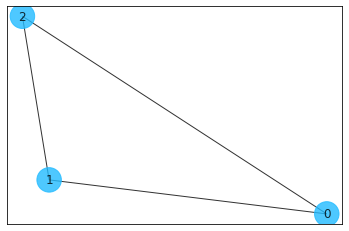

In [19]:
# create minimum eigen optimizer based on VQE
vqe_optimizer = MinimumEigenOptimizer(vqe)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result)

z = tsp.get_tsp_solution(x)
print('solution:', z)
print('solution objective:', tsp.tsp_value(z, ins.w))
draw_tsp_solution(G, z, colors, pos)

In [20]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright